Distribution of prices


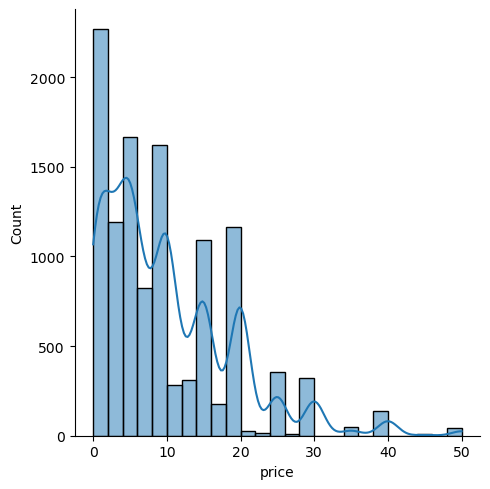

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets

# Get data
df = pd.read_csv('model_a.csv', index_col=0)

# Plotting
print("Distribution of prices")
sns.displot(df['price'],kde=True, bins=25)

Scatterplot of price compared to main content hours


<Axes: xlabel='price', ylabel='main_story'>

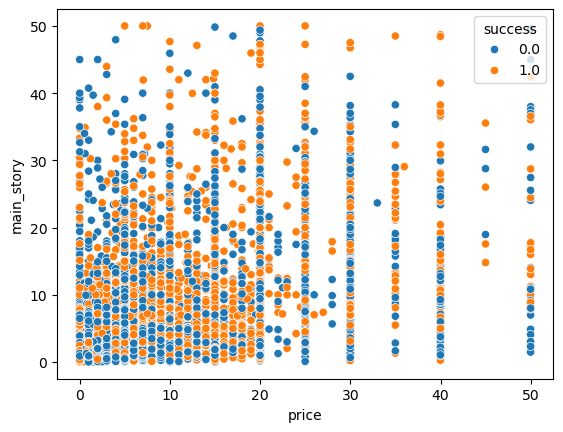

In [25]:
print("Scatterplot of price compared to main content hours")
sns.scatterplot(x='price',y='main_story',hue='success',data=df)

Box plot showing what succesful independent developers tend to charge for their games


<Axes: xlabel='success', ylabel='price'>

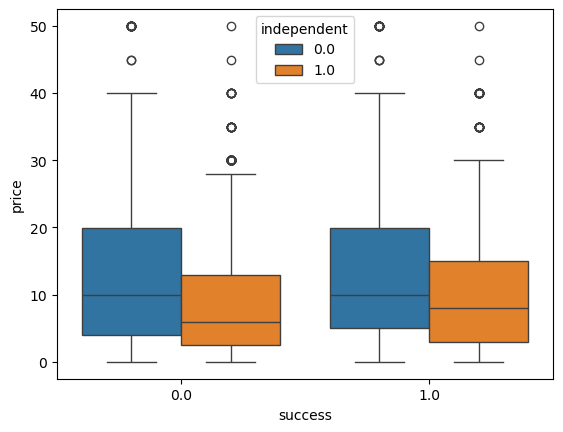

In [26]:
print("Box plot showing what succesful independent developers tend to charge for their games")
sns.boxplot(x='success',y='price',data=df,hue='independent')

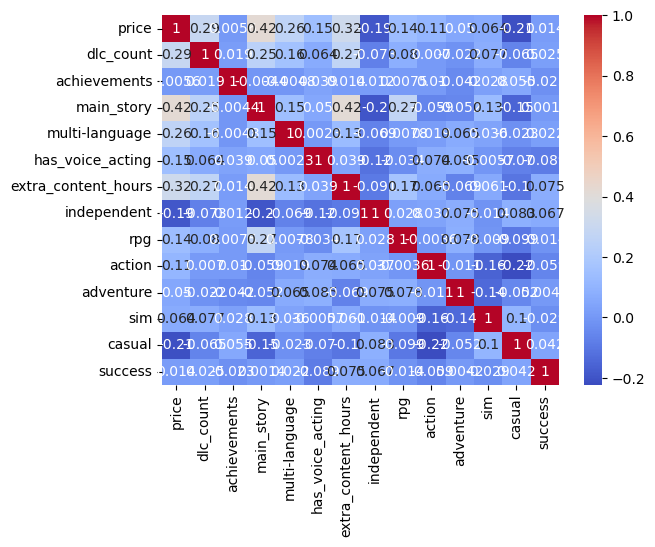

In [27]:
# Heatmap
fc = df.corr(numeric_only=True)
sns.heatmap(fc,annot=True,cmap='coolwarm')
print()

In [28]:
# Making model
X = df.drop(['success'],axis=1)
y = df['success']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
lrmodel = LogisticRegression(solver='saga', penalty='l1', random_state=101)
lrmodel.fit(X_train,y_train)
predictions = lrmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.14      0.22       882
         1.0       0.64      0.94      0.76      1430

    accuracy                           0.63      2312
   macro avg       0.61      0.54      0.49      2312
weighted avg       0.61      0.63      0.55      2312



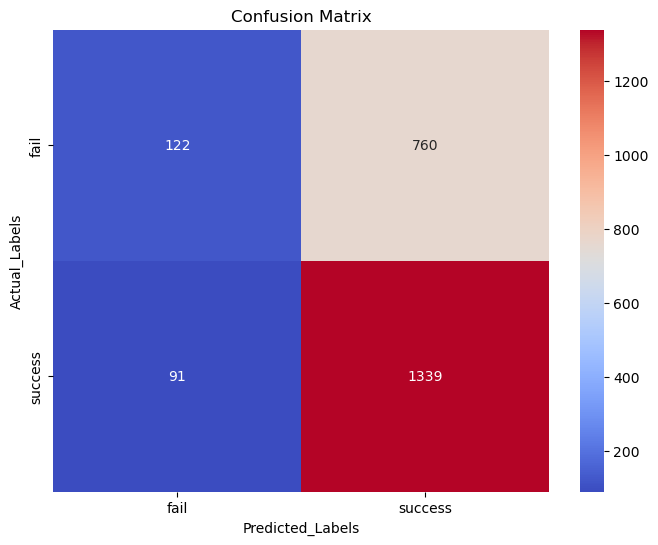

In [29]:
# Confusion Matrix
con_m = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,6))
sns.heatmap(con_m, annot=True, fmt='d', cmap='coolwarm', xticklabels=['fail','success'], yticklabels=['fail','success'])
plt.xlabel('Predicted_Labels')
plt.ylabel('Actual_Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# UI
pri = widgets.FloatSlider(value=5.00,min=0,
    max=50.0,description='Price')
dlc = widgets.IntSlider(value=0,min=0,
    max=20,description='DLC Count')
ach = widgets.IntText(value=1,min=0,
    max=5000,description='Achievement Count')
m_hour = widgets.FloatSlider(value=2.00, min=0,
    max=50.0,description='Average Time To Beat')
lang = widgets.Checkbox(value=False,description='Mulitple Language Support')
voice = widgets.Checkbox(value=False,description='Voice Acting')
ex_hour = widgets.FloatSlider(value=2.00, min=0,
    max=50.0,description='Extra hours left until 100%')
ind = widgets.Checkbox(value=False,description='Indie')
rpg = widgets.Checkbox(value=False,description='RPG')
act = widgets.Checkbox(value=False,description='Action')
adv = widgets.Checkbox(value=False,description='Adventure')
sim = widgets.Checkbox(value=False,description='Simulation')
cas = widgets.Checkbox(value=False,description='Casual')
button = widgets.Button(description="Sumbit")
output = widgets.Output()
print("Input potential game features and press submit for the model to determine if the game will be a success!")
display(pri, dlc, ach, m_hour, lang, voice, ex_hour, ind, rpg, act, adv, sim, cas, button, output)

@output.capture()
def on_button_clicked(b):
    # get values from sliders and checkboxes
    data = [{'price': pri.value, 'dlc_count': dlc.value, 'achievements': ach.value, 'main_story': m_hour.value, 'multi-language': lang.value,
       'has_voice_acting': voice.value, 'extra_content_hours': ex_hour.value, 'independent': ind.value, 'rpg': rpg.value,
       'action': act.value, 'adventure': adv.value, 'sim': sim.value, 'casual': cas.value}]
    df = pd.DataFrame(data)
    new_prediction = lrmodel.predict(df.values)
    if new_prediction[0] == 1:
        guess = "succeed."
    else:
        guess = "fail."

    print("This kind of game is likely to ", guess)

button.on_click(on_button_clicked)

Input potential game features and press submit for the model to determine if the game will be a success!


FloatSlider(value=5.0, description='Price', max=50.0)

IntSlider(value=0, description='DLC Count', max=20)

IntText(value=1, description='Achievement Count')

FloatSlider(value=2.0, description='Average Time To Beat', max=50.0)

Checkbox(value=False, description='Mulitple Language Support')

Checkbox(value=False, description='Voice Acting')

FloatSlider(value=2.0, description='Extra hours left until 100%', max=50.0)

Checkbox(value=False, description='Indie')

Checkbox(value=False, description='RPG')

Checkbox(value=False, description='Action')

Checkbox(value=False, description='Adventure')

Checkbox(value=False, description='Simulation')

Checkbox(value=False, description='Casual')

Button(description='Sumbit', style=ButtonStyle())

Output()